In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df_flat = pd.read_csv('/pscratch/sd/j/jadenhe/gp_spencer_20TeV_flat/lumi.ee.out', sep=' ', header=None)
df_round = pd.read_csv('/pscratch/sd/j/jadenhe/gp_spencer_20TeV_round/lumi.ee.out', sep=' ', header=None)

z1_flat = np.array(df_flat[df_flat.columns[0]].tolist())
z2_flat = np.array(df_flat[df_flat.columns[1]].tolist())

z1_round = np.array(df_round[df_round.columns[0]].tolist())
z2_round = np.array(df_round[df_round.columns[1]].tolist())

cme_flat = 2*np.sqrt(z1_flat*z2_flat)

cme_round = 2*np.sqrt(z1_round*z2_round)

frac_flat = np.sum(cme_flat > 16000)/len(cme_flat)
frac_round = np.sum(cme_round > 16000)/len(cme_round)


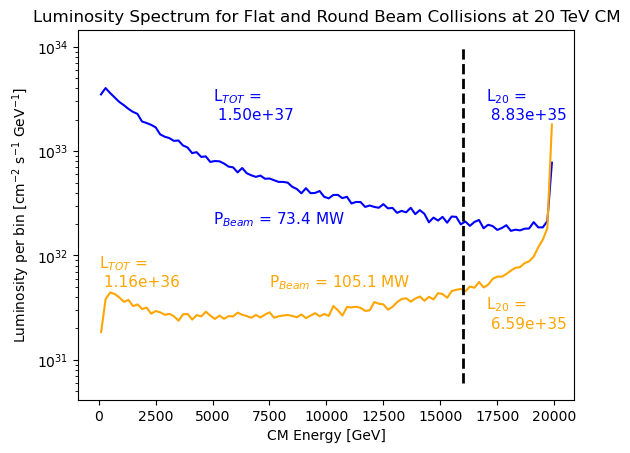

In [17]:
SI_e = 1.602e-19
N_round = 0.5e10
N_flat = 0.5e10
E_round = 10e12 # eV
E_flat = 10e12

#Round Beam
lumi_round = 1.63396e+37 # m^-2
lumi_round_cm = lumi_round/(100**2) # cm^-2
freq_round = 9160 # Hz
total_lumi_round = lumi_round_cm*freq_round; # cm^-2 s^-1

beam_power_round = freq_round*N_round*E_round*SI_e/1e6 # MW

N_r, edges_round = np.histogram(cme_round, 100)

binx_round = edges_round[1] - edges_round[0]

x_ax_round = edges_round[:-1] + binx_round/2

plot_norm_round = total_lumi_round/(sum(N_r)*binx_round) # cm^-2 s^-1 GeV^-1

#Flat Beam
lumi_flat = 8.83465e+35 # m^-2
lumi_flat_cm = lumi_flat/(100**2) # cm^-2
freq_flat = 13120 # Hz
total_lumi_flat = lumi_flat_cm*freq_flat; # cm^-2 s^-1

beam_power_flat = freq_flat*N_flat*E_flat*SI_e/1e6 # MW

N_f, edges_flat = np.histogram(cme_flat, 100)

binx_flat = edges_flat[1] - edges_flat[0]

x_ax_flat = edges_flat[:-1] + binx_flat/2

plot_norm_flat = total_lumi_flat/(sum(N_f)*binx_flat) # cm^-2 s^-1 GeV^-1

#Plot
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(x_ax_round, plot_norm_round*N_r, color='b')
ax.plot(x_ax_flat, plot_norm_flat*N_f, color='orange')
ax.set_xlabel('CM Energy [GeV]')
ax.set_ylabel('Luminosity per bin [cm$^{-2}$ s$^{-1}$ GeV$^{-1}$]')
ax.set_title('Luminosity Spectrum for Flat and Round Beam Collisions at 20 TeV CM')
ax.grid()

ax.plot([16000, 16000], [6E30, 1E34], 'k--', linewidth=2)

ax.text(5000, 2E33, f'L$_{{TOT}}$ = \n {total_lumi_round:.2e}', fontsize=11, color='b')
ax.text(5000, 2E32, f'P$_{{Beam}}$ = {beam_power_round:.1f} MW', fontsize=11, color = 'b')
ax.text(17000, 2E33, f'L$_{{20}}$ = \n {frac_round * total_lumi_round:.2e}', fontsize=11, color = 'b')

ax.text(0, 5E31, f'L$_{{TOT}}$ = \n {total_lumi_flat:.2e}', fontsize=11, color='orange')
ax.text(7500, 5E31, f'P$_{{Beam}}$ = {beam_power_flat:.1f} MW', fontsize=11, color = 'orange')
ax.text(17000, 2E31, f'L$_{{20}}$ = \n {frac_flat * total_lumi_flat:.2e}', fontsize=11, color = 'orange')

ax.grid()

fig.savefig('Luminosity Spectrum for Flat and Round Beam Collisions at 20 TeV CM')

plt.show()